In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Veri yükleme
file_path = r"C:\Users\pro\Desktop\pusula2\Talent_Academy_Case_DT_2025.xlsx"
data = pd.read_excel(file_path, sheet_name="Sheet1")

### Veriyi Anlama

In [3]:
# 1. Veri seti hakkında genel bilgiler
print("===== VERİ SETİ GENEL BİLGİLER =====")
print(data.info())


===== VERİ SETİ GENEL BİLGİLER =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
None


In [4]:
print("\nİlk 10 kayıt:")
print(data.head(10))



İlk 10 kayıt:
   HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   
5   145135   28    Erkek    0 Rh+  Türkiye   
6   145136   60    Erkek    0 Rh+  Türkiye   
7   145136   60    Erkek    0 Rh+  Türkiye   
8   145136   60    Erkek    0 Rh+  Türkiye   
9   145137   65    Kadın    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   
5  Duchenne Musküler Distrofisi, Myastenia gravis...   
6                                                NaN   
7                             

In [5]:
# 2. Eksik veri analizi
print("\n===== EKSİK VERİLER =====")
print(data.isnull().sum())


===== EKSİK VERİLER =====
HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64


In [6]:
# 3. Temel istatistiksel bilgiler
print("\n===== TEMEL İSTATİSTİKSEL BİLGİLER =====")
print(data.describe(include="all"))


===== TEMEL İSTATİSTİKSEL BİLGİLER =====
              HastaNo          Yas Cinsiyet KanGrubu    Uyruk  \
count     2235.000000  2235.000000     2066     1560     2235   
unique            NaN          NaN        2        8        5   
top               NaN          NaN    Kadın    0 Rh+  Türkiye   
freq              NaN          NaN     1274      579     2173   
mean    145333.100224    47.327069      NaN      NaN      NaN   
std        115.214248    15.208634      NaN      NaN      NaN   
min     145134.000000     2.000000      NaN      NaN      NaN   
25%     145235.000000    38.000000      NaN      NaN      NaN   
50%     145331.000000    46.000000      NaN      NaN      NaN   
75%     145432.000000    56.000000      NaN      NaN      NaN   
max     145537.000000    92.000000      NaN      NaN      NaN   

          KronikHastalik                                           Bolum  \
count               1624                                            2224   
unique               220 

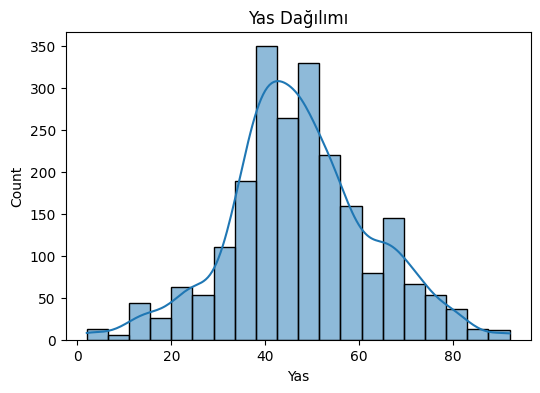

In [8]:

# 4. Sayısal değişkenlerin dağılımı
# 'hastano' kolonunu hariç tutalım çünkü onun numeretik anlamı yok id gibi düşünebilirsiniz
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = [col for col in numeric_cols if col != 'HastaNo'] 

# Her bir sayısal kolonu görselleştirme
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"{col} Dağılımı")
    plt.show()

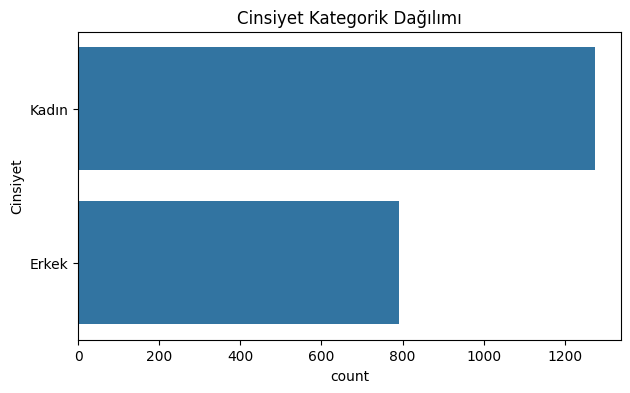

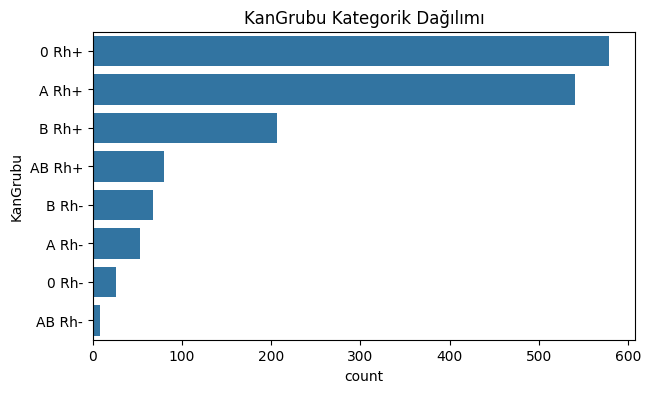

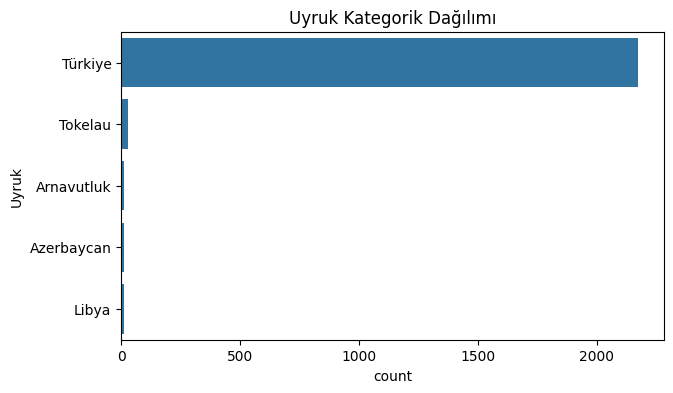

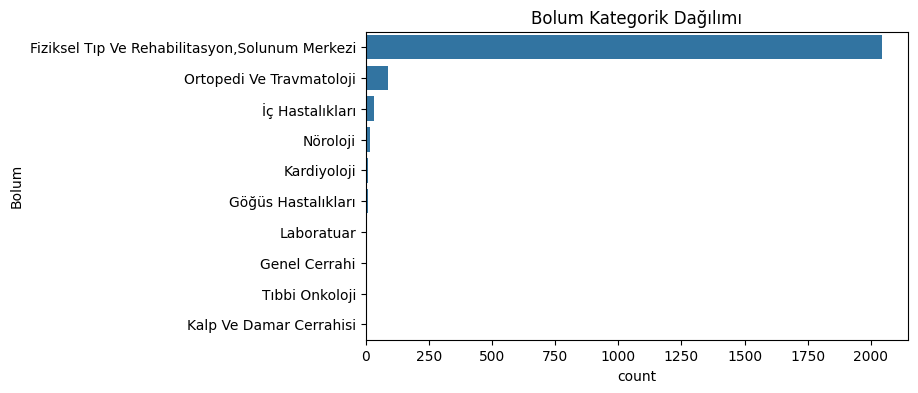

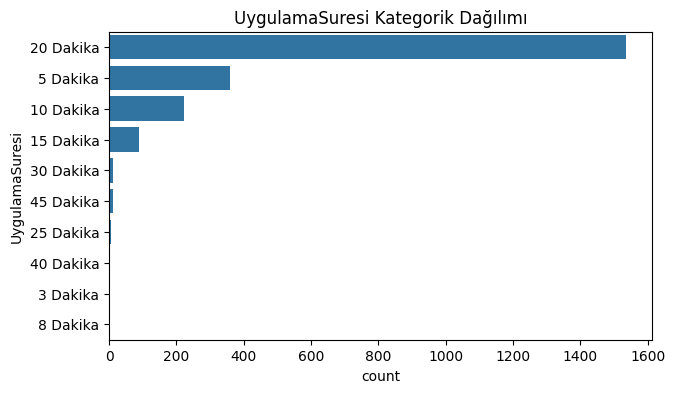

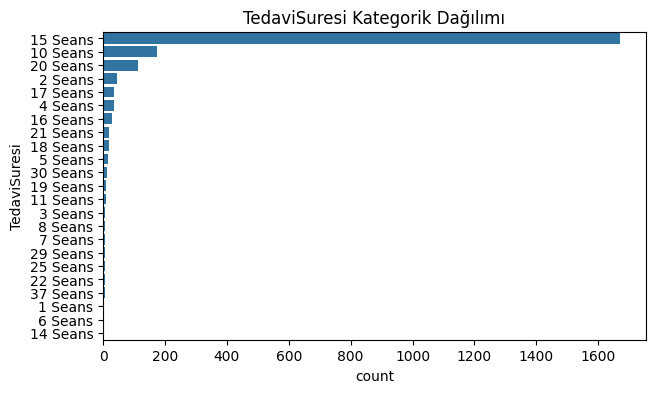

In [9]:
# 5. Kategorik değişkenlerin dağılımı
# Kategorik kolonları seç
categorical_cols = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum', 'UygulamaSuresi', 'TedaviSuresi']

# Her bir kategorik kolonu görselleştirme
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"{col} Kategorik Dağılımı")
    plt.show()

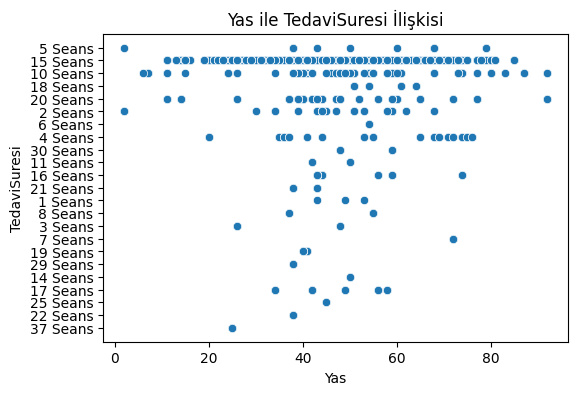

In [10]:
# 7. TedaviSuresi ile yaş değişkeninin ilişkisi
for col in numeric_cols:
    if col != "TedaviSuresi":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=data[col], y=data["TedaviSuresi"])
        plt.title(f"{col} ile TedaviSuresi İlişkisi")
        plt.show()

In [22]:
#Görselden çıkarabileceğimi sonuçlardan bazıları:
#Tedavi süresi (seans sayısı) yaşla çok güçlü bir korelasyona sahip değil.
#Diğer columnları da sayısal değere çevirip inceleyebiliriz.
#Seanslar belirli standart değerlerde kümeleniyor (özellikle 15 seans).


TedaviSuresi ve UygulamaSuresi columnları sayısal veriye çeviriyoruz


In [11]:
file_path = r"C:\Users\pro\Desktop\pusula2\Talent_Academy_Case_DT_2025.xlsx"
df = pd.read_excel(file_path)

In [12]:
import pandas as pd

# TedaviSuresi kolonunda "Seans" ifadesini kaldır, sadece sayı kalsın
df["TedaviSuresi"] = df["TedaviSuresi"].astype(str).str.replace(" Seans", "", regex=False).str.strip()

# UygulamaSuresi kolonunda "Dakika" ifadesini kaldır, sadece sayı kalsın
df["UygulamaSuresi"] = df["UygulamaSuresi"].astype(str).str.replace(" Dakika", "", regex=False).str.strip()

# Gerekirse string olan değerleri integer'a çevir, boş değerleri NaN olarak işaretle
df["TedaviSuresi"] = pd.to_numeric(df["TedaviSuresi"], errors="coerce")
df["UygulamaSuresi"] = pd.to_numeric(df["UygulamaSuresi"], errors="coerce")

# Boş değerleri (NaN) 0 ile doldurmak isterseniz
df["TedaviSuresi"].fillna(0, inplace=True)
df["UygulamaSuresi"].fillna(0, inplace=True)

# Düzenlenmiş veriyi yeni bir dosyaya kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)

print("İşlem tamamlandı! Yeni dosya kaydedildi.")


C:\Users\pro\AppData\Local\Temp\ipykernel_4596\2350065822.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TedaviSuresi"].fillna(0, inplace=True)
C:\Users\pro\AppData\Local\Temp\ipykernel_4596\2350065822.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

İşlem tamamlandı! Yeni dosya kaydedildi.


Aynı hastaya ait ama Cinsiyet ve KanGrubu sütunları boş olan verileri inceleme

In [13]:
# Cinsiyet ve KanGrubu sütunları boş (NaN) ve HastaNo sütunu dolu olan satırları filtrele
sonuc = df[(df['Cinsiyet'].isna()) & (df['KanGrubu'].isna()) & (df['HastaNo'].notna())]

# Bu satırların sayısını getir
print("Cinsiyet ve KanGrubu boş, HastaNo dolu olan satır sayısı:", len(sonuc))

Cinsiyet ve KanGrubu boş, HastaNo dolu olan satır sayısı: 71


In [14]:
def doldur_bos_degerler(df, kolon_adi, kontrol_kolonlari):
    """
    Belirtilen kolon için boş değerleri kontrol_kolonlari'ne göre doldurur.
    Tek bir eşleşen değer varsa doldurur.
    """
    baslangic_bos = df[kolon_adi].isna().sum()
    degisiklik = 0

    for idx, row in df[df[kolon_adi].isna()].iterrows():
        # Filtre: kontrol_kolonlari
        kosul = (df[kontrol_kolonlari[0]] == row[kontrol_kolonlari[0]])
        for col in kontrol_kolonlari[1:]:
            kosul &= (df[col] == row[col])

        # Aynı gruptaki farklı değerleri al
        bilgi = df[kosul & (df[kolon_adi].notna())][kolon_adi].unique()

        if len(bilgi) == 1:  # Tek bir değer varsa doldur
            df.at[idx, kolon_adi] = bilgi[0]
            degisiklik += 1

    print(f"{kolon_adi} için başlangıçta boş: {baslangic_bos}, yapılan değişiklik: {degisiklik}")
    return df



# ✅ Pipeline: Cinsiyet ve KanGrubu doldur
df = doldur_bos_degerler(df, kolon_adi="Cinsiyet", kontrol_kolonlari=["HastaNo", "Yas","Uyruk"])
df = doldur_bos_degerler(df, kolon_adi="KanGrubu", kontrol_kolonlari=["HastaNo", "Yas", "Uyruk"])

# ✅ Yeni dosyayı kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)
print("Yeni dosya kaydedildi.")


Cinsiyet için başlangıçta boş: 169, yapılan değişiklik: 24
KanGrubu için başlangıçta boş: 675, yapılan değişiklik: 31
Yeni dosya kaydedildi.


### Text içeren columnlara işlem

Metin kolonlarında yer alan verileri temizlemek ve her bir metin parçasını normalize etmek için listeleme kullanıyoruz

In [15]:
import re
from rapidfuzz import process, fuzz

# Küçük harfler ve boşlukları normalize et
def clean_text(text):
    text = str(text).strip()
    if any(char.isdigit() for char in text):  # sayı varsa değiştirme
        return text
    text_lower = text.lower()
    text_lower = re.sub(r"[^\w\sçğıöşü]", "", text_lower)  # noktalama kaldır
    text_lower = re.sub(r"\s+", " ", text_lower).strip()   # fazla boşluk kaldır
    return text_lower

# Global dictionary oluşturuyoruz
auto_normalization_dict = {}

def normalize_auto(text, threshold=90):
    if pd.isna(text):
        return None
    
    cleaned = clean_text(text)
    
    # Eğer sayı içeriyorsa değiştirme
    if any(char.isdigit() for char in cleaned):
        return cleaned
    
    # Daha önce gördüğümüz kelime varsa direkt kullan
    if cleaned in auto_normalization_dict:
        return auto_normalization_dict[cleaned]
    
    # Mevcut dictionaryde en benzer kelimeyi bul
    if auto_normalization_dict:
        result = process.extractOne(cleaned, auto_normalization_dict.keys(), scorer=fuzz.ratio)
        if result:  # result None değilse
            match, score, *_ = result
            if score >= threshold:
                auto_normalization_dict[cleaned] = auto_normalization_dict[match]
                return auto_normalization_dict[match]
    
    # Yeni kelime, kendisini kaydet ve döndür
    auto_normalization_dict[cleaned] = cleaned
    return cleaned


def split_and_normalize_column_auto(df, kolon_adi):
    """Liste halindeki kolonları virgülle ayır, normalize et"""
    def process_value(value):
        if pd.isna(value):
            return None
        parts = [normalize_auto(p) for p in str(value).split(",")]
        parts = list(dict.fromkeys(parts))  # unique ve sıra koru
        return parts
    
    df[kolon_adi] = df[kolon_adi].apply(process_value)
    print(f"{kolon_adi} kolonu işlendi.")
    return df

# ✅ İşlem yapılacak kolonlar
kolonlar = ["KronikHastalik", "Bolum", "Alerji", "Tanilar", "UygulamaYerleri"]

# ✅ Pipeline: Her kolon için uygula
for kolon in kolonlar:
    df = split_and_normalize_column_auto(df, kolon)

# ✅ Sonucu kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)
print("İşlem tamamlandı, yeni dosya: Talent_Academy_Case_DT_2025.xlsx")

KronikHastalik kolonu işlendi.
Bolum kolonu işlendi.
Alerji kolonu işlendi.
Tanilar kolonu işlendi.
UygulamaYerleri kolonu işlendi.
İşlem tamamlandı, yeni dosya: Talent_Academy_Case_DT_2025.xlsx


In [16]:
import unicodedata
import pandas as pd

def normalize_text(s: str) -> str:
    """Normalize text (boşluk, unicode, küçük harf)."""
    s = str(s).strip()
    s = " ".join(s.split())  # fazla boşlukları temizle
    s = unicodedata.normalize("NFKC", s)  # unicode normalize
    s = s.casefold()  # küçük harf
    return s

def split_tedavi(value: str):
    """TedaviAdi sütunundaki değeri kurallara göre parçala ve liste döndür."""
    if pd.isna(value):
        return []
    s = str(value).strip()
    
    # 1) "-" varsa önce onu dikkate al
    if "-" in s:
        parts = [p.strip() for p in s.split("-")]
        if parts and parts[-1].isdigit():  # son parça sayı ise ayırma
            return [s]
        return [p for p in parts if p]
    
    # 2) "+" varsa
    elif "+" in s:
        # Eğer "sağ" veya "sol" içeriyorsa -> ayırma
        if any(word in s.casefold().split() for word in ["sağ", "sol"]):
            return [s]
        parts = [p.strip() for p in s.split("+")]
        if parts and parts[-1].isdigit():  # son parça sayı ise ayırma
            return [s]
        return [p for p in parts if p]
    
    # 3) Hiç ayraç yoksa
    else:
        return [s]

# Orijinal listeyi normalize et ve ayır
df["TedaviAdi"] = df["TedaviAdi"].apply(
    lambda value: " ".join([normalize_text(x) for x in split_tedavi(value)])
)

# Kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)


In [17]:
import pandas as pd
import ast
import math
import numpy as np

cols = ["TedaviAdi", "KronikHastalik", "Tanilar"]
total_changes = 0

def normalize_list(cell):
    global total_changes
    
    # Eğer cell None veya np.nan ise direkt dön
    if cell is None or (isinstance(cell, float) and math.isnan(cell)):
        return cell
    
    try:
        # Eğer string ise ve list formatında ise literal_eval
        if isinstance(cell, str):
            if cell.startswith('[') and cell.endswith(']'):
                items = ast.literal_eval(cell)
            else:
                items = [x.strip() for x in cell.split(',') if x.strip()]
        elif isinstance(cell, list) or isinstance(cell, np.ndarray):
            items = list(cell)  # np.array varsa listeye çevir
        else:
            return cell
        
        # Normalize: küçük harf, strip, tekrar orijinal case için ilk eşleşeni al
        norm_map = {}
        for item in items:
            if item is None or (isinstance(item, float) and math.isnan(item)):
                continue
            key = str(item).strip().lower()
            if key not in norm_map:
                norm_map[key] = item.strip() if isinstance(item, str) else item
        
        new_list = list(norm_map.values())
        
        if new_list != items:
            total_changes += 1
        
        return new_list
    except Exception:
        return cell

for col in cols:
    df[col] = df[col].apply(normalize_list)

print("Toplam değişiklik yapılan satır sayısı:", total_changes)

# Sonucu kaydetmek istersen:
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)

Toplam değişiklik yapılan satır sayısı: 0


Eğer KronikHastalik veya Alerji kolonları boşsa aynı hastadan getirip dolduracağız çünkü biliyoruz ki Kronik hastalıklar ve alerjiler değişmez

In [18]:
import pandas as pd


group_cols = ["HastaNo", "Yas", "Cinsiyet", "KanGrubu"]

filled_kronik = 0
filled_alerji = 0

def is_empty(val):
    """Hücrenin boş olup olmadığını güvenli şekilde kontrol et"""
    # NaN (float, None vs.)
    try:
        if pd.isna(val):
            return True
    except Exception:
        pass
    
    # String ise
    if isinstance(val, str):
        return val.strip() == ""
    
    # Liste / array ise
    if isinstance(val, (list, tuple)):
        return len(val) == 0
    
    return False

for idx, row in df.iterrows():
    mask = (df[group_cols] == row[group_cols]).all(axis=1)
    group = df[mask]

    # KronikHastalik doldurma
    if is_empty(row["KronikHastalik"]):
        vals = [v for v in group["KronikHastalik"].dropna() if not is_empty(v)]
        if len(vals) > 0:
            df.at[idx, "KronikHastalik"] = vals[0]
            filled_kronik += 1

    # Alerji doldurma
    if is_empty(row["Alerji"]):
        vals = [v for v in group["Alerji"].dropna() if not is_empty(v)]
        if len(vals) > 0:
            df.at[idx, "Alerji"] = vals[0]
            filled_alerji += 1

print(f"KronikHastalik doldurulan kayıt sayısı: {filled_kronik}")
print(f"Alerji doldurulan kayıt sayısı: {filled_alerji}")

df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)


KronikHastalik doldurulan kayıt sayısı: 5
Alerji doldurulan kayıt sayısı: 0


### Columnlar için encoding ve feature engineering

cinsiyet için binary encoding

In [19]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

# Cinsiyet sütununu binary encode et (Kadın=0, Erkek=1)
df['Cinsiyet'] = df['Cinsiyet'].map({'Kadın': 0, 'Erkek': 1})

# Değişiklikleri aynı Excel dosyasına kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)

print("Cinsiyet sütunu başarıyla binary encode edildi.")


Cinsiyet sütunu başarıyla binary encode edildi.


In [20]:
#sayısal olarak temsil edilmesini sağlayarak makine öğrenmesi modellerinin bu veriyi daha verimli ve hızlı bir şekilde işlemesine olanak tanır.

KanGrubundan KanGrubuTürü ve RhFaktörü columnlarını oluşturduk

In [21]:
# Excel dosyasını yükleyin
df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')

# KanGrubu sütununu kontrol et ve iki yeni sütun oluştur
def extract_kan_grubu_and_rh(kan_grubu):
    if pd.isna(kan_grubu):
        return pd.NA, pd.NA

    # Rh faktörünü ve Kan grubunu ayırma
    if 'Rh+' in kan_grubu:
        kan_grubu_turu = kan_grubu.replace(' Rh+', '')
        rh_faktoru = 'Rh+'
    elif 'Rh-' in kan_grubu:
        kan_grubu_turu = kan_grubu.replace(' Rh-', '')
        rh_faktoru = 'Rh-'
    else:
        kan_grubu_turu = kan_grubu
        rh_faktoru = pd.NA  # Eğer Rh faktörü yoksa

    return kan_grubu_turu, rh_faktoru

# Yeni sütunları oluştur
df[['KanGrubuTürü', 'RhFaktörü']] = df['KanGrubu'].apply(extract_kan_grubu_and_rh).apply(pd.Series)

# Yeni veriyi kontrol etme
print(df[['KanGrubu', 'KanGrubuTürü', 'RhFaktörü']].head())

# Sonucu yeni bir dosyaya kaydetme
df.to_excel('Talent_Academy_Case_DT_2025.xlsx', index=False)


  KanGrubu KanGrubuTürü RhFaktörü
0    0 Rh+            0       Rh+
1    0 Rh+            0       Rh+
2    0 Rh+            0       Rh+
3    0 Rh+            0       Rh+
4    0 Rh+            0       Rh+


In [46]:
#özellikle bazı hastalıkların tanısı ve tedavisinde Rh faktörünün önemli bir rol oynadığı için modelin bu özellikleri daha doğru bir şekilde öğrenmesini sağlar.

Uyruk columnuna One-Hot Encoding

uyruk kategorik dağılımı grafiğinde görmüştük 5 adet uyruk var sadece o yüzden one-hot encoding mantıklı bir tercih olacak

In [22]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

# One-hot encoding uygula
df = pd.get_dummies(df, columns=['Uyruk'], prefix='Uyruk')

# Dosyayı kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)

print("One-hot encoding başarıyla uygulandı ve yeni dosya kaydedildi.")


One-hot encoding başarıyla uygulandı ve yeni dosya kaydedildi.


Yas columudnan YasGrubu columnu çıkartabiliriz. Aşağıdaki format gibi:

0-14 Yaş (Çocuklar ve Ergenler): 0

15-24 Yaş (Gençler ve Genç Yetişkinler): 1

25-64 Yaş (Yetişkinler): 2

65-79 Yaş ve Üstü (Yaşlılar): 3

80 Yaş ve Üstü (Çok Yaşlılar / Yaşlılık Sonrası Dönem): 4


In [23]:

# Excel dosyasını yükleme
df = pd.read_excel('Talent_Academy_Case_DT_2025.xlsx')

# Yaş grubu kategorilerini belirleme fonksiyonu (Ordinal Encoding)
def age_group_encoding(age):
    if age <= 14:
        return 0  # 0-14 Yaş
    elif age <= 24:
        return 1  # 15-24 Yaş
    elif age <= 64:
        return 2  # 25-64 Yaş
    elif age <= 79:
        return 3  # 65-79 Yaş
    else:
        return 4  # 80 Yaş ve Üstü

# 'Yaş' column'unu kontrol etme ve 'Yaş Grubu' column'u ekleme (Ordinal Encoding)
df['Yas Grubu'] = df['Yas'].apply(age_group_encoding)

# Yeni DataFrame'i kaydetme (isteğe bağlı)
df.to_excel('Talent_Academy_Case_DT_2025.xlsx', index=False)



UygulamaSuresi columnu için normalize yapabiliriz.

uygulama süresi kategorik dağılımı grafiğinde görmüştük . 10 adet farklı değerde veri var. herhangi bir tutarsızlık söz konusu değil ama yine de modelin verimli olması açısından normalizasyon işlemini gerçekleştirdik. 

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Excel'i oku
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

# StandardScaler ile z-score standardizasyon
scaler = StandardScaler()
df['UygulamaSuresi'] = scaler.fit_transform(df[['UygulamaSuresi']])

# Sonucu aynı Excel dosyasına kaydet
df.to_excel("Talent_Academy_Case_DT_2025.xlsx", index=False)

print("UygulamaSuresi column'u z-score ile standardize edildi ve kaydedildi.")


UygulamaSuresi column'u z-score ile standardize edildi ve kaydedildi.


### Yeni veri setine göz atalım

In [31]:
# Excel'i oku
df1 = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [32]:
pd.set_option('display.max_columns', None) 
df1.head(20)

,HastaNo,Yas,Cinsiyet,KanGrubu,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,KanGrubuTürü,RhFaktörü,Uyruk_Arnavutluk,Uyruk_Azerbaycan,Uyruk_Libya,Uyruk_Tokelau,Uyruk_Türkiye,Yas Grubu
0,145134,60,0.0,0 Rh+,"['becker musküler distrofisi', 'hiportiroidizm...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",['toz'],['ayak bileği ve ayağın yüzeysel yaralanması'],['ayak bileği'],5,['ayak bileği'],0.546788,0,Rh+,False,False,False,False,True,2
1,145135,28,1.0,0 Rh+,"['duchenne musküler distrofisi', 'myastenia gr...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",NaN,"['omuzun darbe sendromu', 'dorsalji', 'diğer',...",['dorsalji boyun+trapez+skapular'],15,['boyun'],0.546788,0,Rh+,False,False,False,False,True,2
2,145135,28,1.0,0 Rh+,"['duchenne musküler distrofisi', 'myastenia gr...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",NaN,"['omuzun darbe sendromu', 'dorsalji', 'diğer',...",['dorsalji boyun+trapez+skapular'],15,"['boyun', 'sırt']",0.546788,0,Rh+,False,False,False,False,True,2
3,145135,28,1.0,0 Rh+,"['duchenne musküler distrofisi', 'myastenia gr...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",NaN,"['omuzun darbe sendromu', 'dorsalji', 'diğer',...",['dorsalji boyun+trapez+skapular'],15,['boyun'],-1.846613,0,Rh+,False,False,False,False,True,2
4,145135,28,1.0,0 Rh+,"['duchenne musküler distrofisi', 'myastenia gr...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",NaN,"['omuzun darbe sendromu', 'dorsalji', 'diğer',...",['dorsalji boyun+trapez+skapular'],15,"['boyun', 'sırt']",0.546788,0,Rh+,False,False,False,False,True,2
5,145135,28,1.0,0 Rh+,"['duchenne musküler distrofisi', 'myastenia gr...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",NaN,"['omuzun darbe sendromu', 'dorsalji', 'diğer',...",['dorsalji boyun+trapez+skapular'],15,['boyun'],0.546788,0,Rh+,False,False,False,False,True,2
6,145136,60,1.0,0 Rh+,NaN,"['fiziksel tıp ve rehabilitasyon', 'solunum me...","['polen', 'novalgin']",['parapleji ve tetrapleji'],['parapleji'],10,NaN,2.142388,0,Rh+,False,False,False,False,True,2
7,145136,60,1.0,0 Rh+,NaN,"['fiziksel tıp ve rehabilitasyon', 'solunum me...","['polen', 'novalgin']",['parapleji ve tetrapleji'],['parapleji'],10,NaN,0.546788,0,Rh+,False,False,False,False,True,2
8,145136,60,1.0,0 Rh+,NaN,"['fiziksel tıp ve rehabilitasyon', 'solunum me...","['polen', 'novalgin']",['parapleji ve tetrapleji'],['parapleji'],10,NaN,0.546788,0,Rh+,False,False,False,False,True,2
9,145137,65,0.0,0 Rh+,"['hiportiroidizm', 'diyabet', 'duchenne muskül...","['fiziksel tıp ve rehabilitasyon', 'solunum me...",['novalgin'],"['artroz', 'tanımlanmamış', 'el']",['el rehabilitasyonu'],15,['sol el bilek bölgesi'],-0.251013,0,Rh+,False,False,False,False,True,3


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HastaNo           2235 non-null   int64  
 1   Yas               2235 non-null   int64  
 2   Cinsiyet          2090 non-null   float64
 3   KanGrubu          1591 non-null   object 
 4   KronikHastalik    1629 non-null   object 
 5   Bolum             2224 non-null   object 
 6   Alerji            1291 non-null   object 
 7   Tanilar           2160 non-null   object 
 8   TedaviAdi         2235 non-null   object 
 9   TedaviSuresi      2235 non-null   int64  
 10  UygulamaYerleri   2014 non-null   object 
 11  UygulamaSuresi    2235 non-null   float64
 12  KanGrubuTürü      1591 non-null   object 
 13  RhFaktörü         1591 non-null   object 
 14  Uyruk_Arnavutluk  2235 non-null   bool   
 15  Uyruk_Azerbaycan  2235 non-null   bool   
 16  Uyruk_Libya       2235 non-null   bool   


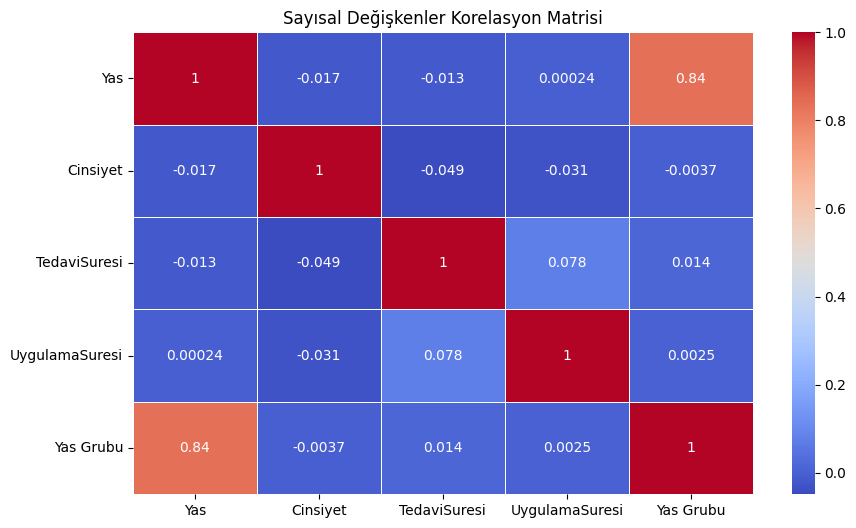

In [40]:
# Korelasyon analizi (sayısal değişkenler)
# HastaNo sütununu numeric_cols listesinden çıkar
numeric_cols = df1.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = [col for col in numeric_cols if col != 'HastaNo']

# Korelasyon matrisini oluştur
plt.figure(figsize=(10,6))
sns.heatmap(df1[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.show()